### EDA on Algorand's finance data.
EDA is the lifelihood of every data analysis project, and it aims to understand the data, by visualizations and simple data metrics, and for our case, check if feasible to be consumed by our Machine learning model.

In [1]:
import vectorbt as vbt
import yfinance as yf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix


from datetime import datetime
sns.set(rc={'figure.figsize':(10,5)})

In [2]:
%matplotlib inline

In [3]:
data = yf. download ("ALGO-USD", start="2021-10-11", end="2022-10-11")
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-11 00:00:00+00:00,1.768067,1.833448,1.680078,1.717525,1.717525,307108559
2021-10-12 00:00:00+00:00,1.717085,1.754366,1.608586,1.744901,1.744901,411949621
2021-10-13 00:00:00+00:00,1.746279,1.844707,1.692659,1.838683,1.838683,356995291
2021-10-14 00:00:00+00:00,1.837135,1.880034,1.780301,1.804155,1.804155,337223002
2021-10-15 00:00:00+00:00,1.809252,1.809252,1.732818,1.752944,1.752944,327662647


Description of columns

Date- Represents the dates of the year.
Open- It is the price at which the financial security opens in the market when trading begins



High- The high is the highest price at which a stock traded during a period.



Low- Please enter a descriptLow is the minimum price of a stock in a period ion



Close- Closing price generally refers to the last price at which a stock trades during a regular trading session



Adj close- The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any



Volume- Volume measures the number of shares traded in a stock or contracts traded in futures or options.



In [7]:
data.to_csv("algoyf.csv")
df= pd.read_csv("algoyf.csv")
#df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-11 00:00:00+00:00,1.768067,1.833448,1.680078,1.717525,1.717525,307108559
1,2021-10-12 00:00:00+00:00,1.717085,1.754366,1.608586,1.744901,1.744901,411949621
2,2021-10-13 00:00:00+00:00,1.746279,1.844707,1.692659,1.838683,1.838683,356995291
3,2021-10-14 00:00:00+00:00,1.837135,1.880034,1.780301,1.804155,1.804155,337223002
4,2021-10-15 00:00:00+00:00,1.809252,1.809252,1.732818,1.752944,1.752944,327662647


In [8]:
#descriptive stats
df.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,0.864555,0.899878,0.827122,0.860279,0.860279,2.656836e+08
std,0.565222,0.596924,0.538374,0.563585,0.563585,2.893097e+08
min,0.282037,0.290151,0.276489,0.282036,0.282036,4.141433e+07
25%,0.349124,0.358588,0.335648,0.348689,0.348689,1.069121e+08
50%,0.737021,0.758263,0.711530,0.732773,0.732773,1.934746e+08
75%,1.367939,1.415247,1.324646,1.357751,1.357751,3.333824e+08
max,2.145598,2.829822,2.035689,2.150452,2.150452,4.203184e+09


In [10]:
### Check data consistency if feasible for our ML model.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       365 non-null    object 
 1   Open       365 non-null    float64
 2   High       365 non-null    float64
 3   Low        365 non-null    float64
 4   Close      365 non-null    float64
 5   Adj Close  365 non-null    float64
 6   Volume     365 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


The data has no missing values.

## Analyze the data

Text(0.5, 1.0, 'Volume of stock versus time')

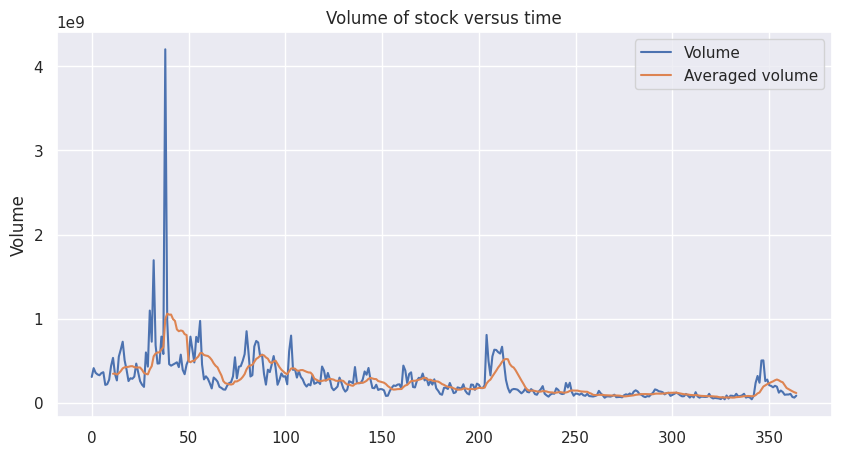

In [11]:
# Plotting data distribution of the volume

sns.lineplot(x=df.index,y=df['Volume'],label='Volume')
sns.lineplot(x=df.index,y=df['Volume'].rolling(window=12).mean(),label='Averaged volume')
plt.title('Volume of stock versus time')



A visualization of the volume of stocks daily from day 1 to day 365 in a year. We can see that there was a massive shoot of Algo's stocks around December or end of the year, and then it goes down after and plateaus, till now.

<AxesSubplot: title={'center': 'Algorand stock price'}>

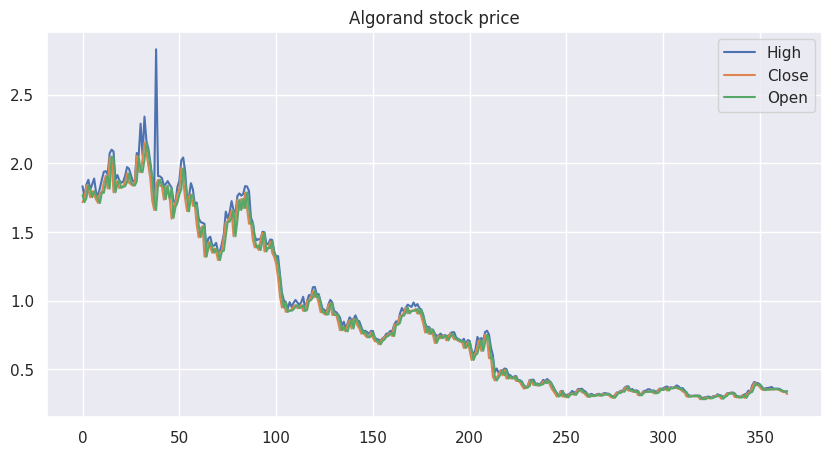

In [12]:
df.plot(y=['High','Close','Open'],title='Algorand stock price')


This diagram shows the visualization of the stock price at high, close and open. We can see that most of the stock price opens at the lowest price, and closes lower than the highest price bidded. 

# candlestick chart

In [13]:
# pulll data back

candlestick=go.Candlestick(x=df['Date'], low=df['Low'], high=df['High'], close=df['Close'], open=df['Open'])
fig= go.Figure(data=[candlestick])
fig.show()